In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp

In [2]:
def my_numpy_matrix(n):

    h = 1/n

    a = -2 * np.ones(n-1)
    b = np.ones(n-2)

    A = np.diag(b, -1) + np.diag(a, 0) + np.diag(b, 1)

    return A/h**2

# ---------------------------------------------------------------- #

n = 4
A = my_numpy_matrix(n)

#print(A)

In [3]:
# returns structured array of eigen value & vector pairs sorted by value
def sorted_eigen_pairs(A):

    values, vectors = np.linalg.eig(A)

    values  = np.array(values)
    vectors = np.array(vectors)
    vectors = np.transpose(vectors)

    n = len(values)

    pairs = np.zeros(n, dtype = [('eigen_value', 'f8'),
                                 ('eigen_vector', 'f8', (n))])

    pairs['eigen_value'] = values
    pairs['eigen_vector'] = vectors

    indices = np.argsort(pairs, order = ['eigen_value'])
    indices = np.flip(indices)

    return pairs[indices]

def sorted_eigen_values_and_vectors(A):

    pairs = sorted_eigen_pairs(A)

    values  = []
    vectors = []

    for pair in pairs:
        values  += [pair[0]]
        vectors += [pair[1]]

    if len(pairs) == 1:
        values  = np.array([values,])
        vectors = np.array([vectors,])
    else:
        values  = np.array(values)
        vectors = np.array(vectors)

    return values, vectors

def sorted_eigen_values(A):
    return sorted_eigen_values_and_vectors(A)[0]

def sorted_eigen_vectors(A):
    return sorted_eigen_values_and_vectors(A)[1]

# ---------------------------------------------------------------- #

def all_of_my_shit_actually_works(n):

    A = my_numpy_matrix(n)

    values  = sorted_eigen_values(A)
    vectors = sorted_eigen_vectors(A)

    print("sorted eigen values: ")
    print(values, "\n")
    print("sorted eigen vectors:")
    print(vectors, "\n")

    for value, vector in zip(values, vectors):

        a = value * vector
        print("value * vector:")
        print(a, "\n")

        b = A @ vector
        print("A @ vector:")
        print(b, "\n")

        print("same:")
        print(abs(b-a) < 1e-9, "\n")

# ---------------------------------------------------------------- #

n = 5

#all_of_my_shit_actually_works(n)

In [4]:
def show_eigen_info(M):

        """
        print("Matrix:")
        print(M)
        print("")
        """

        pairs = sorted_eigen_values_and_vectors(M)
        values, vectors = pairs

        """
        print("Eigenpairs:")
        for j, pair in enumerate(pairs):
            if j <= j_max:
                print(pair)
        print("")
        """

        #"""
        print("Eigenvalues:")
        for j, value in enumerate(values):
            if j <= j_max:
                print(value)
        print("")
        #"""

        """
        print("Eigenvectors:")
        for j, vector in enumerate(vectors):
            if j <= j_max:
                print(vector)
        print("")
        """

In [5]:
def show_my_eigen_info(n_min, n_max, j_max):

    assert 2 <= n_min <= n_max

    print("----------------------------------------------------------------", "\n")

    for n in range(n_min, n_max+1):
        print("n =", n)
        print("-----")
#         print("h =", 1/n)
#         print("")

        A = my_numpy_matrix(n)

        show_eigen_info(A)

#         print("----------------------------------------------------------------", "\n")

# ---------------------------------------------------------------- #

n_min = 2
n_max = 10
j_max = n_max

show_my_eigen_info(n_min, n_max, j_max)

---------------------------------------------------------------- 

n = 2
-----
Eigenvalues:
[-8.]

n = 3
-----
Eigenvalues:
-9.0
-27.0

n = 4
-----
Eigenvalues:
-9.372583002030478
-31.999999999999996
-54.62741699796946

n = 5
-----
Eigenvalues:
-9.549150281252611
-34.54915028125264
-65.45084971874735
-90.45084971874735

n = 6
-----
Eigenvalues:
-9.646170927520402
-35.99999999999999
-71.99999999999997
-108.00000000000001
-134.35382907247953

n = 7
-----
Eigenvalues:
-9.705050945562961
-36.89799941784412
-76.19294847228122
-119.80705152771888
-159.10200058215582
-186.29494905443664

n = 8
-----
Eigenvalues:
-9.743419838555344
-37.49033200812192
-79.01652065726852
-127.9999999999999
-176.98347934273144
-218.50966799187793
-246.25658016144442

n = 9
-----
Eigenvalues:
-9.769795432682793
-37.90080021472559
-80.99999999999997
-133.8689952179573
-190.13100478204277
-243.00000000000014
-286.09919978527444
-314.2302045673173

n = 10
-----
Eigenvalues:
-9.788696740969272
-38.19660112501045
-82.4

In [6]:
def show_eigen_limits(j_max):
    for j in range(1, j_max+1):
        print("-({} * pi)^2 =".format(j), -(j * np.pi)**2)

# ---------------------------------------------------------------- #

j_max = 9

#show_eigen_limits(j_max)

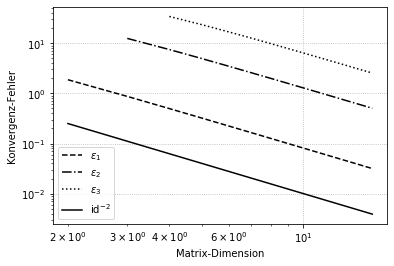

In [7]:
# n_max .......... maximum matrix type
# eigen_amount ... maximum amount of eigen values to track

# ---------------------------------------------------------------- #

# plots convergence error of eigen values
def plot_1(n_max, eigen_amount, lines):

    # there are n_max-1 eigen values/vectors at max
    assert eigen_amount < n_max

    # where eigen values should converge to
    eigen_limits = -(np.array(range(1, eigen_amount+1)) * np.pi)**2

    # matrix types
    x = np.array(range(2, n_max+1))
    # upper triangular matrix of eigen values times eigen value instances
    y = np.zeros((eigen_amount, len(x)))

    # iterate over eigen value instances
    for i in range(y.shape[1]):

        # let's talk about values, baby
        A = my_numpy_matrix(x[i])
        eigen_values = sorted_eigen_values(A)

        # iterate over eigen value instances
        for j in range(np.minimum(x[i]-1, eigen_amount)):
            y[j][i] = abs(eigen_limits[j] - eigen_values[j])

    # probably just for shits and giggles
    fig, ax = plt.subplots()

    # do actual plotting
    for j, line in zip(range(eigen_amount), lines):
        plt.loglog(x[j::], y[j][j::], line, color = 'black')

    # add reference
    plt.loglog(x, 1/x**2, color = 'black')

    # add legend
    legend = []
    legend += ["$\epsilon_{}$".format(j) for j in range(1, eigen_amount+1)]
    legend += ["id$^{{-2}}$"]

    plt.legend((*legend,))

    # add labels
    ax.set_xlabel("Matrix-Dimension")
    ax.set_ylabel("Konvergenz-Fehler")

    # add grid
    plt.grid(linestyle = ':')
 
    # showtime
    plt.show()

# ---------------------------------------------------------------- #

n_max        = 16
eigen_amount = 3

lines = ['--', '-.', ':']

plot_1(n_max, eigen_amount, lines)

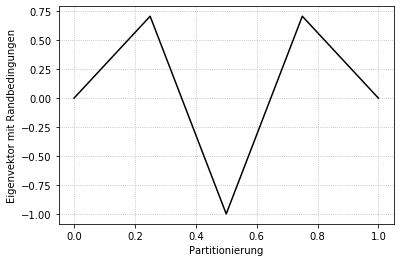

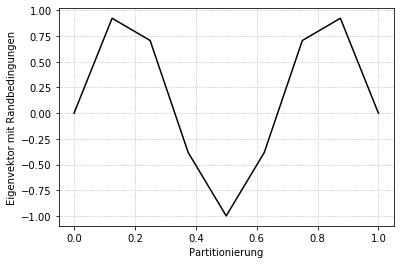

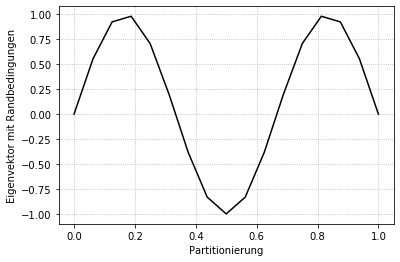

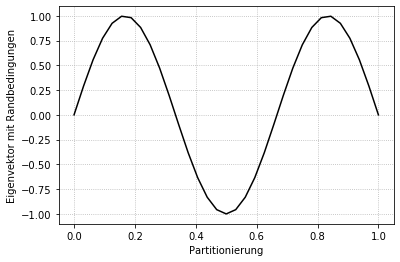

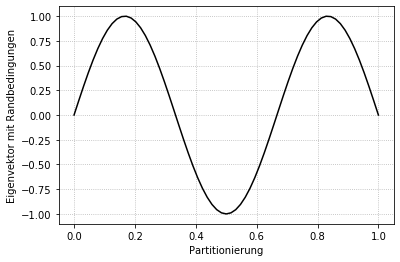

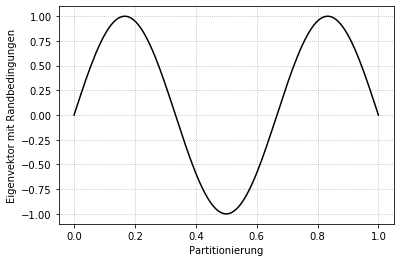

In [22]:
# under construction:

# eigen_number ... which eigen vector to plot

# plots eigen vector iterations
def plot_2(n, eigen_number):

    # there are n_max-1 eigen values/vectors at max
    assert eigen_number < n

    # let's talk about vectors, baby
    A = my_numpy_matrix(n)
    eigen_vectors = sorted_eigen_vectors(A)

    # which eigen vector to plot
    eigen_vector = eigen_vectors[eigen_number]
    # normalize norm
    eigen_vector = eigen_vector/np.amax(abs(eigen_vector))
    # normalize orientation
    eigen_vector = eigen_vector * np.sign(eigen_vector[0])

    # partition of [0, 1]
    x = np.linspace(0, 1, n+1)
    # eigen vector with boundary condition
    y = np.concatenate(([0], eigen_vector, [0]))
    
    # probably just for shits and giggles
    fig, ax = plt.subplots()

    # do actual plotting
    plt.plot(x, y, color = 'black')

    """
    # add reference

    kappa = np.pi * (eigen_number+1)
    C_1 = 0
    C_2 = 1
    y = C_1*np.cos(kappa * x) + C_2*np.sin(kappa * x)

    plt.plot(x, y, color = 'black')
    """

    # add labels
    ax.set_xlabel("Partitionierung")
    ax.set_ylabel("Eigenvektor mit Randbedingungen")

    # add grid
    plt.grid(linestyle = ':')
 
    # showtime
    plt.show()

# ---------------------------------------------------------------- #

p_max = 8
eigen_number = 2

for p in range(2, p_max):
    n = 2**p
    if eigen_number < n:
        plot_2(n, eigen_number)

In [9]:
# calculate determinants of my_numpy_matrix and its variation

def my_determinant_1(n):

    A = my_numpy_matrix(n)

    det = np.linalg.det(A)

    return det

def my_determinant_2(n):

    A = my_numpy_matrix(n)
    A_prime = A/n**2

    det = np.linalg.det(A_prime)

    return det

def calculate_determinants(n_max):

    for n in range(2, n_max):
        det = my_determinant_1(n)
        det = round(det, 4)
        print("det(A_{}) =".format(n), det)

    print("")

    for n in range(2, n_max):
        det = my_determinant_2(n)
        det = round(det, 8)
        print("det(A'_{}) =".format(n), det)

# ---------------------------------------------------------------- #

n_max = 10

#calculate_determinants(n_max)

In [10]:
def my_sympy_matrix(n):

    h = 1/n

    def fill(i, j):

        if i == j:
            return -2
        elif i == j-1 or i-1 == j:
            return 1
        else:
            return 0

    A = sp.Matrix(n-1, n-1, fill)

    return A

def calculate_jordan_matrices(n_max):

    print("----------------------------------------------------------------", "\n")

    for n in range(2, n_max):
        A = my_sympy_matrix(n)
        print("A_{} =".format(n))
        display(A)

        (P, J) = A.jordan_form()
        print("Jordan normal form of A_{} =".format(n))
        display(J)

        print("----------------------------------------------------------------", "\n")

# ---------------------------------------------------------------- #

n_max = 4

#calculate_jordan_matrices(n_max)

In [11]:
def calculate_random_shait():

    kappa = sp.IndexedBase('\kappa')

    R = sp.Matrix([[ sp.sin(kappa[0]/2),  kappa[0]*sp.cos(kappa[0]/2), 0               ],
                   [-sp.cos(kappa[1]/2),  kappa[1]*sp.sin(kappa[1]/2), sp.cos(kappa[1])],
                   [-sp.sin(kappa[1]/2), -kappa[1]*sp.cos(kappa[1]/2), sp.sin(kappa[1])]])
    R = R.T

    display(R)

    det = sp.det(R)
    display(det)
    print(sp.latex(det))

    det = sp.simplify(det)
    display(det)
    print(sp.latex(det))

# ---------------------------------------------------------------- #

#calculate_random_shait()

In [12]:
# c ... pair of propagation speeds

def get_zero_function(c):

    # allocate some sympy symbols:
    omega = sp.Symbol('\omega')
    kappa = sp.IndexedBase('\kappa')

    # implement the matrix R (properly):
    R = sp.Matrix([[ sp.sin(kappa[0]/2),  kappa[0]*sp.cos(kappa[0]/2), 0               ],
                   [-sp.cos(kappa[1]/2),  kappa[1]*sp.sin(kappa[1]/2), sp.cos(kappa[1])],
                   [-sp.sin(kappa[1]/2), -kappa[1]*sp.cos(kappa[1]/2), sp.sin(kappa[1])]])
    R = R.T

    # calculate R's determinant (properly):
    det = sp.det(R)
    det = sp.simplify(det)

    # substitute for kappa_0 and kappa_1:
    kappa_0 = omega/c[0]
    kappa_1 = omega/c[1]
    substitution = {kappa[0]: kappa_0, kappa[1]: kappa_1}
    det = det.subs(substitution)

    # transform expression det into proper numpy function:
    zero_function = sp.lambdify(omega, det, 'numpy')

    return zero_function

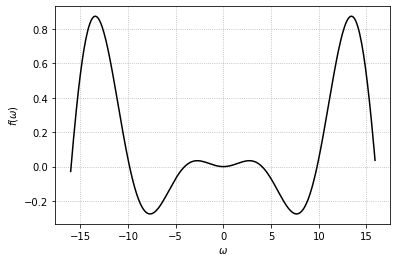

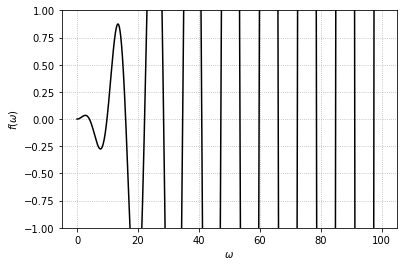

In [13]:
# interval ... where to plot
# limits ..... pair of boundaries for y-axis

def plot_omegas(zero_function, interval, **kwargs):

    f = zero_function
    a = interval[0]
    b = interval[1]
    dt = 0.1

    x = np.arange(a, b, dt)
    y = f(x)

    fig, ax = plt.subplots()

    ax.set_xlabel("$\omega$")
    ax.set_ylabel("$f(\omega)$")

    if 'limits' in kwargs.keys():
        plt.ylim(*kwargs['limits'])

    plt.plot(x, y, color = 'black')
    plt.grid(linestyle = ":")
    plt.show()

# ---------------------------------------------------------------- #

c = (100, 1)
zero_function = get_zero_function(c)

interval = (-16, 16)

plot_omegas(zero_function, interval)

limit = 1

interval = (0, 100)
limits   = (-limit, limit)

plot_omegas(zero_function, interval, limits = limits)

In [14]:
from scipy.optimize import fsolve

# guesses ... array of guesses for omega to start iteration

def find_omegas(zero_function, guesses, tol):

    f = zero_function

    for guess in guesses:
        solutions = fsolve(f, guess, xtol = tol)
        print("solutions when guessing \omega = {}:".format(guess))
        print(solutions)
        print("squared:")
        print(solutions**2)
        print("")

# ---------------------------------------------------------------- #

c = (100, 1)
zero_function = get_zero_function(c)

guesses = [0, 5, 10, 15]
tol     = 1e-8

find_omegas(zero_function, guesses, tol)

solutions when guessing \omega = 0:
[0.]
squared:
[0.]

solutions when guessing \omega = 5:
[4.05742465]
squared:
[16.46269482]

solutions when guessing \omega = 10:
[9.82605835]
squared:
[96.55142264]

solutions when guessing \omega = 15:
[15.9568155]
squared:
[254.61996082]



In [64]:
def my_other_matrix(n, c):

    times = np.floor((n-1)/2)
    times = int(times)

    lower = [1/c[0]]*times
    upper = [1/c[1]]*times

    middle = [2/(c[0] + c[1])]

    if n%2 != 0:
        B = np.diag(lower + upper)**2
        return B
    else:
        B = np.diag(lower + middle + upper)**2
        return B

def my_other_matrix_inverse(n, c):

    times = np.floor((n-1)/2)
    times = int(times)

    lower = [c[0]]*times
    upper = [c[1]]*times

    middle = [(c[0] + c[1])/2]

    if n%2 != 0:
        B_inverse = np.diag(lower + upper)**2
        return B_inverse
    else:
        B_inverse = np.diag(lower + middle + upper)**2
        return B_inverse

# ---------------------------------------------------------------- #


def test(n, c):
    B = my_other_matrix(n, c)
    B_inverse = my_other_matrix_inverse(n, c)

    print(B, "\n")
    print((2/(c[0] + c[1]))**2, "\n")

    print(B_inverse, "\n")
    print(((c[0] + c[1])/2)**2, "\n")

n = 5
c = (100, 1)

# test(n, c)

In [16]:
def show_my_generalized_eigen_info(n_min, n_max, j_max, c):

    assert 2 <= n_min <= n_max
    assert c[0] != 0 and c[1] != 0

    print("----------------------------------------------------------------", "\n")

    for n in range(n_min, n_max+1):
        print("n =", n)
        print("-----")
#        print("h =", 1/n)
#        print("")

        A = my_numpy_matrix(n)
        B_inverse = my_other_matrix_inverse(n, c)
        B_inverse_A = B_inverse@A

        show_eigen_info(B_inverse_A)

#        print("----------------------------------------------------------------", "\n")

# ---------------------------------------------------------------- #

n_min = 1000
n_max = 1000
j_max = 2
c = (100, 1)

show_my_generalized_eigen_info(n_min, n_max, j_max, c)

---------------------------------------------------------------- 

n = 1000
-----
Eigenvalues:
-16.44054324040394
-96.3725475394107
-254.1214683324469



In [34]:
# under construction:

from scipy.linalg import lu, solve_triangular

def vector_iteration(n, c, rho, tol):
    randy = np.random.rand(n-1)*1000
#     print(randy)

    A = my_numpy_matrix(n)
    B = my_other_matrix(n, c)
    M = A - rho*B
    L, U = lu(M, permute_l = True)

#     print(L)
#     print(U)

    for i in range(1000):
        randy = B@randy
        tmp = solve_triangular(L, randy, lower = True)
        randy = solve_triangular(U, tmp, lower = False)
        randy = randy/np.linalg.norm(randy)
#         print(randy)

    return np.dot(A@randy, randy)

# ---------------------------------------------------------------- #



shifted = vector_iteration(1000, (100, 1), 16, 1e-3)

print(1/shifted + 16)

15.91196184665376
